In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import time

In [43]:
def rgb2gray(img):
    
    img_gray = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
    return img_gray

def gaussian_filter_2d(filter_size):
    sigma = filter_size/6.
    x_vals = np.linspace(-3*sigma, 3*sigma, filter_size)
    y_vals = x_vals.copy()
    z = np.zeros((filter_size, filter_size))
    for row in range(filter_size):
        x = x_vals[row]
        for col in range(filter_size):
            y = y_vals[col]
            z[row, col] = np.exp(-(x**2+y**2)/(2*sigma**2))
    z = z/np.sum(z)

    return z

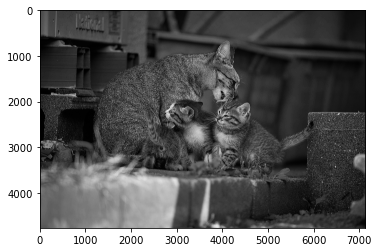

In [44]:
img_teste1 = plt.imread('imgs/imagens-teste/gatitos.jpg')
img_gray = rgb2gray(img_teste1)
plt.imshow(img_gray, 'gray')

Dimensão da imagem: 4764, 7138
Duração da convolução espacial: 4869.45
Duração da convolução por fft: 1.58


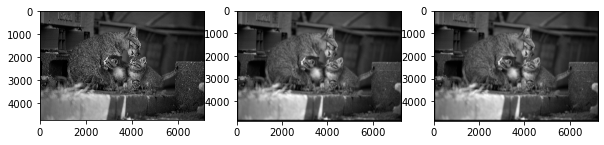

In [47]:
w = gaussian_filter_2d(100)

before = time.time()
img2D_filtered = signal.convolve(img_gray, w,method='direct')
after = time.time()

duration = after-before

before = time.time()
img2D_filtered_fft = signal.convolve(img_gray, w,method='fft')
after = time.time()

duration_fft = after-before

plt.figure(figsize=[10,10])
plt.subplot(1, 3, 1)
plt.imshow(img_gray, 'gray')
plt.subplot(1, 3, 2)
plt.imshow(img2D_filtered, 'gray')
plt.subplot(1, 3, 3)
plt.imshow(img2D_filtered_fft, 'gray')

x, y = img_gray.shape
print(f"Dimensão da imagem: {x}, {y}")

print("Duração da convolução espacial: {:.2f}".format(duration))
print("Duração da convolução por fft: {:.2f}".format(duration_fft))

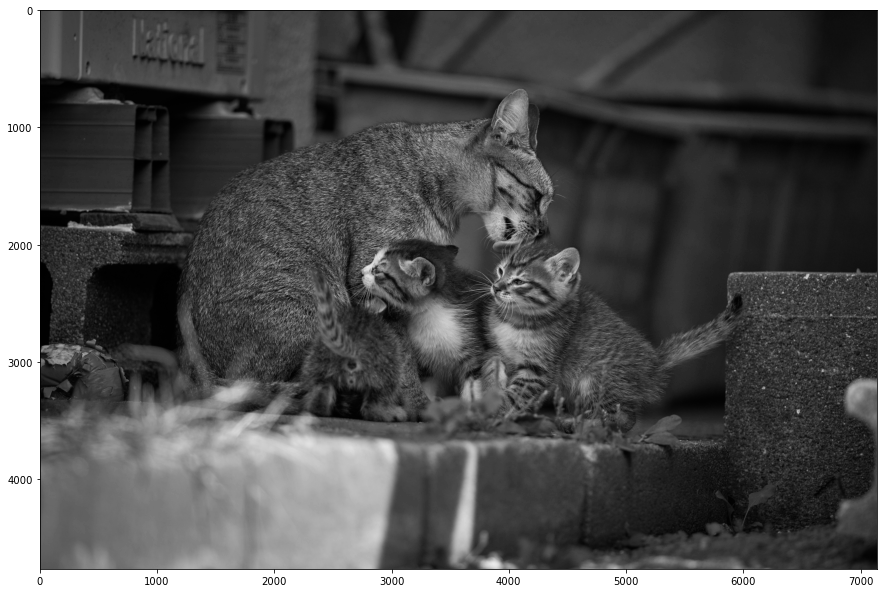

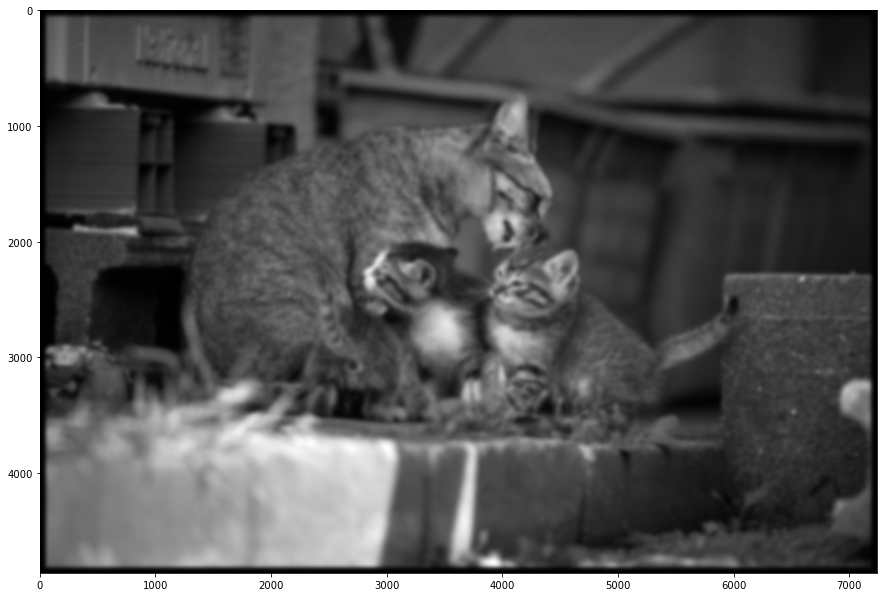

In [54]:
w = gaussian_filter_2d(100)
img2D_filtered_fft = signal.convolve(img_gray, w,method='fft')
plt.figure(figsize=[15,15])
plt.imshow(img_gray, 'gray')
plt.figure(figsize=[15,15])
plt.imshow(img2D_filtered_fft, 'gray')

Dimensão da imagem: 256, 256
Duração da convolução espacial: 0.17
Duração da convolução por fft: 0.00


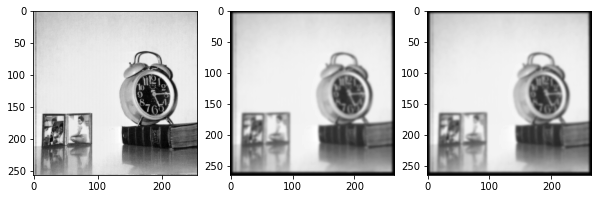

In [45]:
img_teste2 = plt.imread('imgs/imagens-teste/misc/5.1.12.tiff')

w = gaussian_filter_2d(10)

before = time.time()
img2D_filtered = signal.convolve(img_teste2, w,method='direct')
after = time.time()

duration = after-before

before = time.time()
img2D_filtered_fft = signal.convolve(img_teste2, w,method='fft')
after = time.time()

duration_fft = after-before

plt.figure(figsize=[10,10])
plt.subplot(1, 3, 1)
plt.imshow(img_teste2, 'gray')
plt.subplot(1, 3, 2)
plt.imshow(img2D_filtered, 'gray')
plt.subplot(1, 3, 3)
plt.imshow(img2D_filtered_fft, 'gray')

x, y = img_teste2.shape
print(f"Dimensão da imagem: {x}, {y}")

print("Duração da convolução espacial: {:.2f}".format(duration))
print("Duração da convolução por fft: {:.2f}".format(duration_fft))

Dimensão da imagem: 512, 512
Duração da convolução espacial: 0.46
Duração da convolução por fft: 0.01


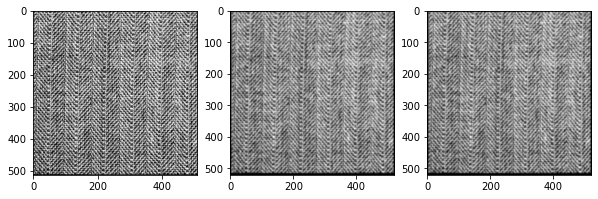

In [48]:
img_teste3 = plt.imread('imgs/imagens-teste/textures/1.2.04.tiff')

w = gaussian_filter_2d(10)

before = time.time()
img2D_filtered = signal.convolve(img_teste3, w,method='direct')
after = time.time()

duration = after-before

before = time.time()
img2D_filtered_fft = signal.convolve(img_teste3, w,method='fft')
after = time.time()

duration_fft = after-before

plt.figure(figsize=[10,10])
plt.subplot(1, 3, 1)
plt.imshow(img_teste3, 'gray')
plt.subplot(1, 3, 2)
plt.imshow(img2D_filtered, 'gray')
plt.subplot(1, 3, 3)
plt.imshow(img2D_filtered_fft, 'gray')

x, y = img_teste3.shape
print(f"Dimensão da imagem: {x}, {y}")

print("Duração da convolução espacial: {:.2f}".format(duration))
print("Duração da convolução por fft: {:.2f}".format(duration_fft))

# Código mais organizado:

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import time


# Funções que serão úteis

# Função para normalização das imagens
def normalize_imgs(img):

    # rgb para escala de cinza
    img_gray = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]

    # normalizar valores e definir tipo np.uint8
    img_norm = img_gray - np.min(img_gray)
    img_norm = img_norm/np.max(img_norm)
    img_norm = 255*img_norm
    img_norm = img_norm.astype(np.uint8)

    return img_norm


# Função para gerar o filtro gaussiano que seraá usado
def gaussian_filter_2d(filter_size):

    sigma = filter_size/6.
    x_vals = np.linspace(-3*sigma, 3*sigma, filter_size)
    y_vals = x_vals.copy()
    z = np.zeros((filter_size, filter_size))
    
    for row in range(filter_size):
        x = x_vals[row]
        
    for col in range(filter_size):
        y = y_vals[col]
        z[row, col] = np.exp(-(x**2+y**2)/(2*sigma**2))
        
    z = z/np.sum(z)

    return z


# Função para definir quais tamanhos de filtro iremos usar nos testes.
# O tam do filtro é definido por determinada porcentagem do tam da imagem.
# Em "img_size" é passo esse tam da imagem.
def w_sizes_based_on_img_percentages(img_size, num_filters, starting_percent, dist_between_f_sizes):

    # Array que guarda os tamanhos dos filtros
    filter_sizes = []

    i = 0
    aux_num_filters = num_filters

    while i < aux_num_filters:

        # A porcentagem começa em starting_percent%, e vai aumentando em "dist_between_f_sizes" a cada filtro.
        # Ou seja, se começa em 1%, e dist_between_f_sizes = 3, nosso 2o filtro terá 4% do tam da imagem.
        percentage = (starting_percent+(dist_between_f_sizes*i))/100
        w_size = int(img_size*percentage)

        # Se o tam do filtro for menor que 3, não há filtro de gaussiana.
        # Nesse caso, não adicionamos o tam no array, e geramos o prox tamanho
        if w_size < 3:
            aux_num_filters += 1
        else:
            filter_sizes.append(w_size)
            
        i += 1

    return filter_sizes

In [148]:
def image_info(img):
    
    print(f'Tamanho: {img.shape}\n',
          f'Tipo de dado: {img.dtype}\n',
          f'Menor valor: {img.min()}\n',
          f'Maior valor: {img.max()}\n',
          f'Valores únicos: {len(np.unique(img))}',
          sep=''
         )

In [149]:
# Carregamento de imagens que iremos usar nos testes 
# Três imagens 256x256
img_1_256 = plt.imread('imgs/imagens-teste/1_256.tiff')
img_2_256 = plt.imread('imgs/imagens-teste/2_256.tiff')
img_3_256 = plt.imread('imgs/imagens-teste/3_256.tiff')

# Três imagens 512x512
img_1_512 = plt.imread('imgs/imagens-teste/1_512.tiff')
img_2_512 = plt.imread('imgs/imagens-teste/2_512.tiff')
img_3_512 = plt.imread('imgs/imagens-teste/3_512.tiff')

# Três imagens 1024x1024
img_1_1024 = plt.imread('imgs/imagens-teste/1_1024.tiff')
img_2_1024 = plt.imread('imgs/imagens-teste/2_1024.tiff')
img_3_1024 = plt.imread('imgs/imagens-teste/3_1024.tiff')

# Imagens maiores
img_bigger_1 = plt.imread('imgs/imagens-teste/miau_2160.jpg')
img_bigger_2 = plt.imread('imgs/imagens-teste/aerial_2250.tiff')
img_bigger_3 = plt.imread('imgs/imagens-teste/gatos_4764.jpg')

# Pré processamento para padronizar as imagens
img_bigger_1 = normalize_imgs(img_bigger_1)
img_bigger_2 = normalize_imgs(img_bigger_2)
img_bigger_3 = normalize_imgs(img_bigger_3)


In [150]:
# Função que calula convolução da img com filtro w, 
# retorna a img filtrada e o tempo de execução em segs
# se parametro fft=False, faz convolução espacial
# caso contrário, por fft
def convolve(img, w, fft=False):
    
    before = time.time()
    if fft:
        img_filtered = signal.convolve(img, w, mode='same', method='fft')
    else:
        img_filtered = signal.convolve(img, w, mode='same', method='direct')
        
    after = time.time()
    duration = after-before
    
    return img_filtered, duration

In [151]:
# Função que faz a convolução da img com diferentes tamanhos de filtro.
# Os tamanhos de filtro que deseja usar são passados pelo array w_sizes.
def convolve_with_some_filters(img, w_sizes, plot=False):

    # "exec_times_" irá salvar os tempos de execução
    # Exemplo: [img_w1_time, img_w2_time, ...]
    exec_times_spatial = []
    exec_times_fft = []

    for size in w_sizes:

        # Criando o filtro
        w = gaussian_filter_2d(size)

        # convolução espacial
        filtered_img, time = convolve(img, w, fft=False)
        exec_times_spatial.append(time)

        # convolução por fft
        filtered_img, time = convolve(img, w, fft=True)
        exec_times_fft.append(time)


        if plot:

            # Plotando o filtro
            plt.figure(figsize=[12, 12])
            a = plt.subplot(1, 3, 1)
            a.set_title('Filtro Gaussiano:', fontsize=16)
            plt.imshow(w)

            # plotando imagem original
            a = plt.subplot(1, 3, 2)
            a.set_title('Imagem original:', fontsize=16)
            plt.imshow(img)

            # plotando imagem filtrada
            a = plt.subplot(1, 3, 3)
            a.set_title('Imagem filtrada:', fontsize=16)
            plt.imshow(filtered_img)

    return filtered_img, exec_times_spatial, exec_times_fft

In [154]:
# Definindo tamanho de filtros para cada tamanho de imagem
w_sizes_256 = w_sizes_based_on_img_percentages(256, num_filters=4, starting_percent=0.5, dist_between_f_sizes=1)
w_sizes_512 = w_sizes_based_on_img_percentages(512, 4, 0.5, 1)
w_sizes_1024 = w_sizes_based_on_img_percentages(1024, 4, 0.5, 1)
w_sizes_2160 = w_sizes_based_on_img_percentages(2160, 3, 0.5, 1)
w_sizes_2250 = w_sizes_based_on_img_percentages(2250, 3, 0.5, 1)
w_sizes_4764 = w_sizes_based_on_img_percentages(4764, 3, 0.5, 1)

print(w_sizes_256)
print(w_sizes_512)
print(w_sizes_1024)
print(w_sizes_2160)
print(w_sizes_2250)
print(w_sizes_4764)

[3, 6, 8, 11]
[7, 12, 17, 23]
[5, 15, 25, 35]
[10, 32, 54]
[11, 33, 56]
[23, 71, 119]


In [155]:
# Calculando convolução para imagens 256x256
stime_256 = [[],[],[]]
ffttime_256 = [[],[],[]]
filtered_1_256, stime_256[0], ffttime_256[0] = convolve_with_some_filters(img_1_256, w_sizes_256)
filtered_2_256, stime_256[1], ffttime_256[1] = convolve_with_some_filters(img_2_256, w_sizes_256)
filtered_3_256, stime_256[2], ffttime_256[2] = convolve_with_some_filters(img_3_256, w_sizes_256)

#calculando valor total de execução da célula por curiosidade msmo
total_time = 0
for list_i in stime_256:
    for tempo_s in list_i:
        total_time += tempo_s

for list_j in ffttime_256:
    for tempo_fft in list_j:
        total_time += tempo_fft

print("Tempo total nesta célula: {:.2f} segundos".format(total_time))

Tempo total nesta célula: 0.74 segundos


In [156]:
# Calculando convolução para imagens 512x512
stime_512 = [[],[],[]]
ffttime_512 = [[],[],[]]
filtered_1_512, stime_512[0], ffttime_512[0] = convolve_with_some_filters(img_1_512, w_sizes_512)
filtered_2_512, stime_512[1], ffttime_512[1] = convolve_with_some_filters(img_2_512, w_sizes_512)
filtered_3_512, stime_512[2], ffttime_512[2] = convolve_with_some_filters(img_3_512, w_sizes_512)

#calculando valor total de execução da célula por curiosidade msmo
total_time = 0
for list_i in stime_512:
    for tempo_s in list_i:
        total_time += tempo_s

for list_j in ffttime_512:
    for tempo_fft in list_j:
        total_time += tempo_fft

print("Tempo total nesta célula: {:.2f} segundos".format(total_time))

Tempo total nesta célula: 11.83 segundos


In [157]:
# Calculando convolução para imagens 1024x1024
stime_1024 = [[],[],[]]
ffttime_1024 = [[],[],[]]
filtered_1_1024, stime_1024[0], ffttime_1024[0] = convolve_with_some_filters(img_1_1024, w_sizes_1024)
filtered_2_1024, stime_1024[1], ffttime_1024[1] = convolve_with_some_filters(img_2_1024, w_sizes_1024)
filtered_3_1024, stime_1024[2], ffttime_1024[2] = convolve_with_some_filters(img_3_1024, w_sizes_1024)

#calculando valor total de execução da célula por curiosidade msmo
total_time = 0
for list_i in stime_1024:
    for tempo_s in list_i:
        total_time += tempo_s

for list_j in ffttime_1024:
    for tempo_fft in list_j:
        total_time += tempo_fft

print("Tempo total nesta célula: {:.2f} segundos".format(total_time))

Tempo total nesta célula: 98.37 segundos


In [160]:
# Calculando convolução para imagens maiores
stime_others = [[],[],[]]
ffttime_others = [[],[],[]]
filtered_1_others, stime_others[0], ffttime_others[0] = convolve_with_some_filters(img_bigger_1, [32])

#calculando valor total de execução da célula por curiosidade msmo
total_time = 0
for list_i in stime_others:
    for tempo_s in list_i:
        total_time += tempo_s

for list_j in ffttime_others:
    for tempo_fft in list_j:
        total_time += tempo_fft

print("Tempo total nesta célula: {:.2f} segundos".format(total_time))

Tempo total nesta célula: 68.78 segundos


In [161]:
# Calculando convolução para imagens maiores
stime_others = [[],[],[]]
ffttime_others = [[],[],[]]
filtered_2_others, stime_others[0], ffttime_others[0] = convolve_with_some_filters(img_bigger_2, [33])

#calculando valor total de execução da célula por curiosidade msmo
total_time = 0
for list_i in stime_others:
    for tempo_s in list_i:
        total_time += tempo_s

for list_j in ffttime_others:
    for tempo_fft in list_j:
        total_time += tempo_fft

print("Tempo total nesta célula: {:.2f} segundos".format(total_time))

Tempo total nesta célula: 79.85 segundos
